# Analysing the performance of my trained ML algorithm to predict listeners backchannel behaviours (head nods)

In [12]:
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import train

%matplotlib inline

In [4]:
FIGSIZE = (10, 6)

## Inspect the model performance on the data

In [18]:
store = pd.HDFStore('data.hdf')

with open('model.pickle', 'rb') as f:
    clf = pickle.load(f)

In [22]:
def plot_data(df, *, title=None, figsize=FIGSIZE):
    """
    Plot the (already prepared for training) interaction for investigation.
    """
    spreaded = df - np.arange(len(df.columns)) * 2
    spreaded.plot(figsize=figsize)

    # Put a legend to the right of the current axis
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Hide Y axis labels
    plt.yticks([])
    
    if title is not None:
        plt.title(title)
    

def set_prediction(clf, df, n=WINDOW_SIZE):
    """
    Add the prediction to the table.
    """
    samples = train.to_samples(df)
    X = samples[:, :-1]
    Ypredict = clf.predict(X)
    Ypredict = np.concatenate([[np.nan] * (n - 1), Ypredict])
    df['prediction'] = Ypredict

CPU times: user 28.6 s, sys: 93.3 ms, total: 28.7 s
Wall time: 11.1 s


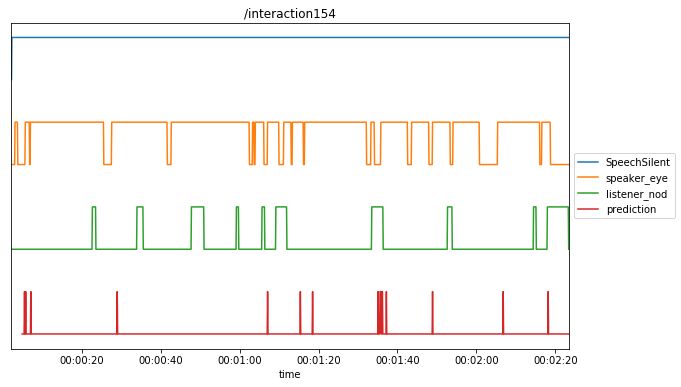

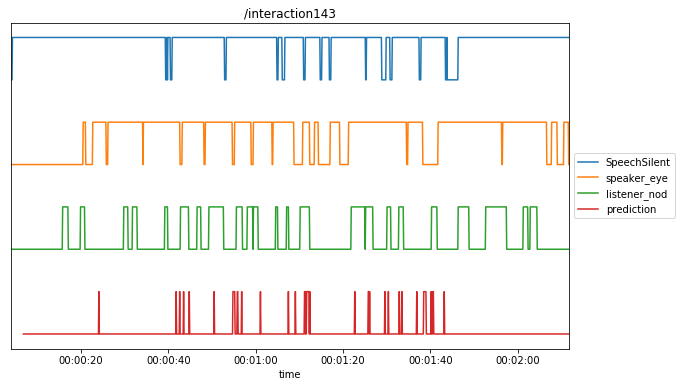

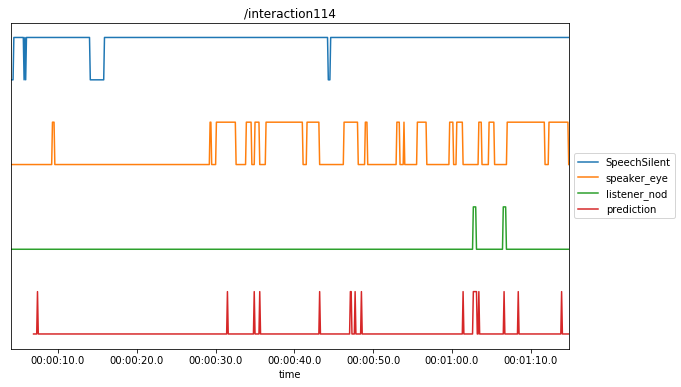

In [23]:
%%time

for key in random.sample(store.keys(), 3):
    df = train.prepare_interaction(store[key])
    set_prediction(clf, df)
    plot_data(df, title=key)